In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Visualización de los datos importantes para la predicción

## Goles a favor contra número de victorias cada año

### Cargar los datos de una temporada

In [2]:
archivos = os.listdir("Datos_Formateados/")
dataframes = []
    
for archivo in archivos:
    # Leer el archivo y almacenar el DataFrame en la lista
    df = pd.read_csv("Datos_Formateados/"+archivo)
    dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
datos_partidos = pd.concat(dataframes, ignore_index=True)
datos_partidos = pd.concat([dataframes[0],dataframes[1],dataframes[2],dataframes[3],dataframes[4],dataframes[5],dataframes[6],dataframes[7]], ignore_index=True)
datos_partidos.fillna(0, inplace=True)
datos_partidos.shape

(1016, 25)

### Conseguir los equipos de esa temporada

In [3]:
def get_tenistas(dataframe: pd.DataFrame) -> list:
    list = []
    for idx,partido in dataframe.iterrows():
        if partido['P'] not in list:
            list.append(partido['P'])
        if partido['S'] not in list:
            list.append(partido['S'])
    return list

tenistas = get_tenistas(dataframe=datos_partidos)
len(tenistas)

247

### Conseguir el número de goles a favor de la temporada de cada equipo

In [4]:
def get_puntos_marcados_por_partido(dataframe: pd.DataFrame, tenistas: str) -> list:      
    puntosP = dataframe.loc[dataframe['P'] == tenistas, ['P1', 'P2', 'P3', 'P4', 'P5']].sum().sum()
    puntosS = dataframe.loc[dataframe['S'] == tenistas, ['S1', 'S2', 'S3', 'S4', 'S5']].sum().sum()

    return puntosP + puntosS
for tenista in tenistas:
    puntos = get_puntos_marcados_por_partido(dataframe=datos_partidos, tenistas=tenista)
    #print("El "+tenista+" ha marcado: "+str(puntos)+" puntos")

### Conseguir el número de victorias de cada equipo

In [5]:
def get_victorias(dataframe: pd.DataFrame, tenista: str) -> int:
    victoriasP = len(dataframe[(dataframe['P'] == tenista) & (dataframe['Gana_P'] == 1)])
    victoriasS = len(dataframe[(dataframe['S'] == tenista) & (dataframe['Gana_P'] == 0)])
    return victoriasP + victoriasS

for tenista in tenistas:
    victorias = get_victorias(dataframe=datos_partidos, tenista=tenista)
    #print("El "+tenista+" ha ganado: "+str(victorias)+" partidos")

### Graficar los datos

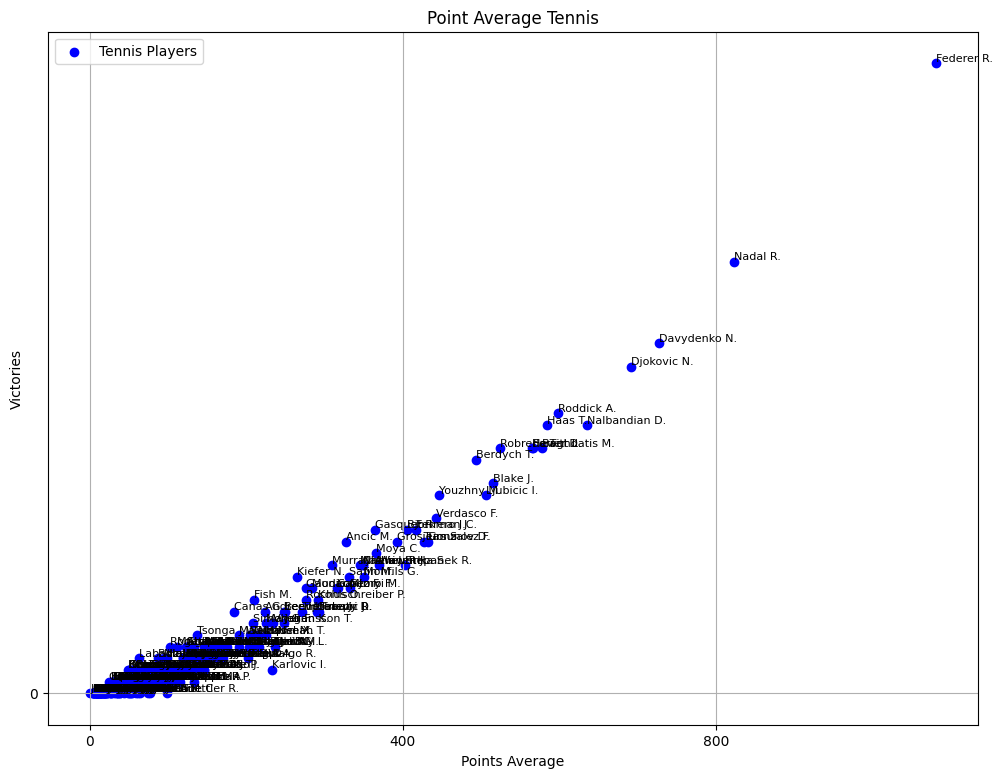

In [6]:
tenistas = get_tenistas(dataframe=datos_partidos)
puntos_marcados_todos_equipos = []
victorias_todos_equipos = []
for tenista in tenistas:
    puntos_marcados_todos_equipos.append(get_puntos_marcados_por_partido(dataframe=datos_partidos, tenistas=tenista))
    victorias_todos_equipos.append(get_victorias(dataframe=datos_partidos, tenista=tenista))
maximos_goles = max(puntos_marcados_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(puntos_marcados_todos_equipos, victorias_todos_equipos, color='blue', label='Tennis Players')  # Puntos en la gráfica para cada equipo
for i, tenista in enumerate(tenistas):
    plt.text(puntos_marcados_todos_equipos[i], victorias_todos_equipos[i], tenista, fontsize=8, ha='left', va='bottom')
plt.xlabel('Points Average')
plt.ylabel('Victories')
plt.title('Point Average Tennis')
plt.xticks(range(0, int(maximos_goles)+1, 400))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 100))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

## Goles en contra vs victorias cada año

### Conseguir goles en contra de cada equipo cada año

In [7]:
def get_puntos_recibidos_por_partido(dataframe: pd.DataFrame, tenistas: str) -> list:      
    puntosP = dataframe.loc[dataframe['S'] == tenistas, ['P1', 'P2', 'P3', 'P4', 'P5']].sum().sum()
    puntosS = dataframe.loc[dataframe['P'] == tenistas, ['S1', 'S2', 'S3', 'S4', 'S5']].sum().sum()

    return puntosP + puntosS
for tenista in tenistas:
    puntos = get_puntos_recibidos_por_partido(dataframe=datos_partidos, tenistas=tenista)
    #print("El "+tenista+" ha recibido: "+str(puntos)+" puntos")

### Graficar los datos

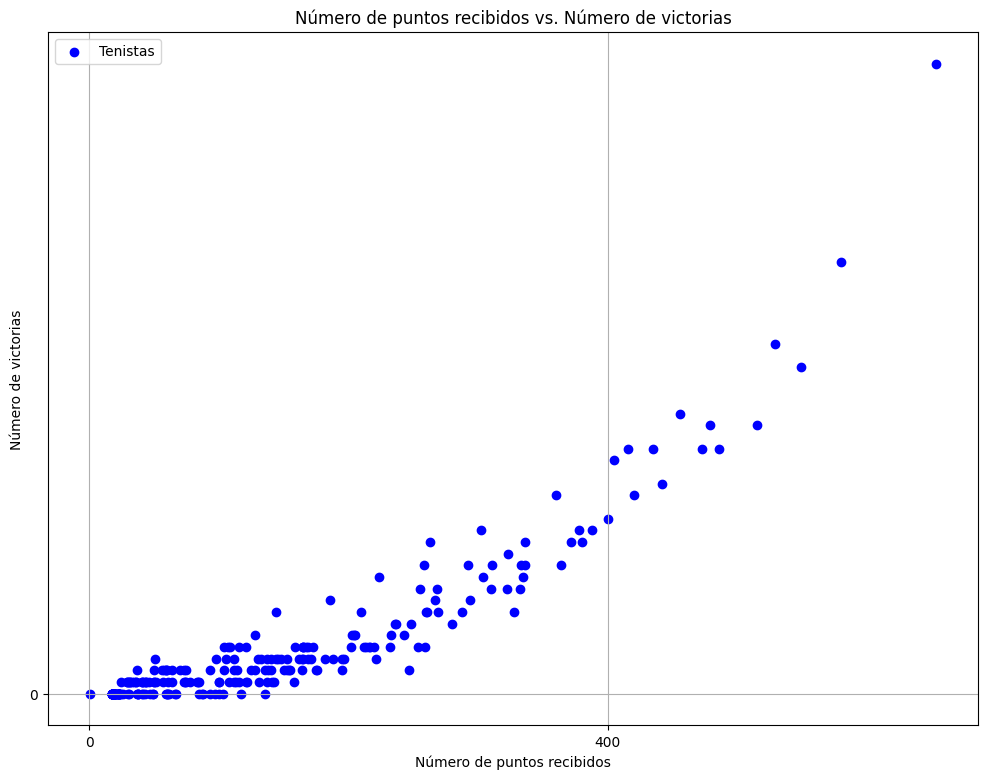

In [8]:
tenistas = get_tenistas(dataframe=datos_partidos)
puntos_marcados_todos_equipos = []
victorias_todos_equipos = []
for tenista in tenistas:
    puntos_marcados_todos_equipos.append(get_puntos_recibidos_por_partido(dataframe=datos_partidos, tenistas=tenista))
    victorias_todos_equipos.append(get_victorias(dataframe=datos_partidos, tenista=tenista))
maximos_goles = max(puntos_marcados_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(puntos_marcados_todos_equipos, victorias_todos_equipos, color='blue', label='Tenistas')  # Puntos en la gráfica para cada equipo
#for i, tenista in enumerate(tenistas):
    #plt.text(puntos_marcados_todos_equipos[i], victorias_todos_equipos[i], tenista, fontsize=8, ha='left', va='bottom')
plt.xlabel('Número de puntos recibidos')
plt.ylabel('Número de victorias')
plt.title('Número de puntos recibidos vs. Número de victorias')
plt.xticks(range(0, int(maximos_goles)+1, 400))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 100))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

## Fusionar ambos datos

### Primera aproximación: Gol Average

In [9]:
def get_puntos_average(dataframe: pd.DataFrame, tenista: str) -> int:
    puntos_a_favor = get_puntos_marcados_por_partido(dataframe=dataframe, tenistas=tenista)
    puntos_en_contra = get_puntos_recibidos_por_partido(dataframe=dataframe, tenistas=tenista)
    return puntos_a_favor - puntos_en_contra

for tenista in tenistas:
    punto_average = get_puntos_average(dataframe=datos_partidos, tenista=tenista)
    #print("El "+tenista+" tiene un punto average de: "+str(punto_average))

### Graficar los datos

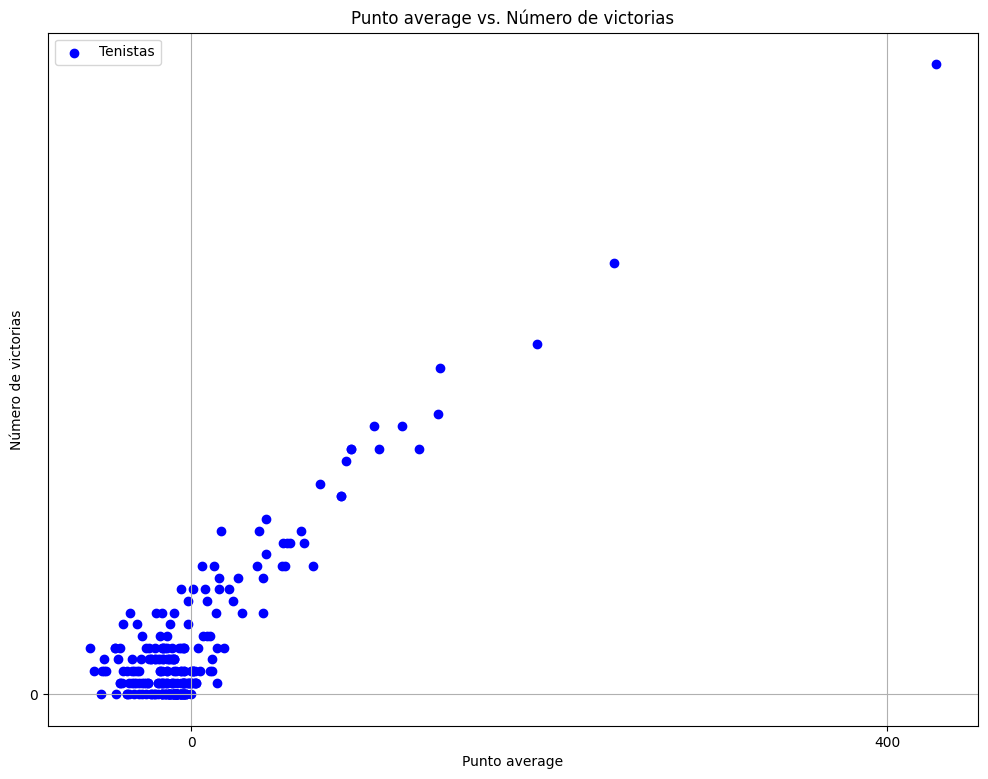

In [10]:
tenistas = get_tenistas(dataframe=datos_partidos)
puntos_marcados_todos_equipos = []
victorias_todos_equipos = []
for tenista in tenistas:
    puntos_marcados_todos_equipos.append(get_puntos_average(dataframe=datos_partidos, tenista=tenista))
    victorias_todos_equipos.append(get_victorias(dataframe=datos_partidos, tenista=tenista))
maximos_goles = max(puntos_marcados_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(puntos_marcados_todos_equipos, victorias_todos_equipos, color='blue', label='Tenistas')  # Puntos en la gráfica para cada equipo
#for i, tenista in enumerate(tenistas):
    #plt.text(puntos_marcados_todos_equipos[i], victorias_todos_equipos[i], tenista, fontsize=8, ha='left', va='bottom')
plt.xlabel('Punto average')
plt.ylabel('Número de victorias')
plt.title('Punto average vs. Número de victorias')
plt.xticks(range(0, int(maximos_goles)+1, 400))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 100))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

### Segunda aproximación: media de goles marcados por partido

In [11]:
def get_partidos_jugados_por_tenista(dataframe: pd.DataFrame, tenista: str) -> int:
    partidos_jugados_local = len(dataframe.loc[dataframe['P'] == tenista])
    partidos_jugados_visitante = len(dataframe.loc[dataframe['S'] == tenista])
    return partidos_jugados_local + partidos_jugados_visitante


def get_media_puntos_marcados(dataframe: pd.DataFrame, tenista: str) -> float:
    puntos_marcados = get_puntos_marcados_por_partido(dataframe=dataframe, tenistas=tenista)
    partidos_jugados = get_partidos_jugados_por_tenista(dataframe=dataframe, tenista=tenista)
    return puntos_marcados / partidos_jugados

for tenista in tenistas:
    partidos_jugados = get_partidos_jugados_por_tenista(dataframe=datos_partidos, tenista=tenista)
    media_puntos_marcados = get_media_puntos_marcados(dataframe=datos_partidos, tenista=tenista)
    #print("El "+tenista+" tiene una media de puntos marcados por partido de: "+str(media_puntos_marcados))
    #print("Partidos jugados:", partidos_jugados)

### Graficar datos

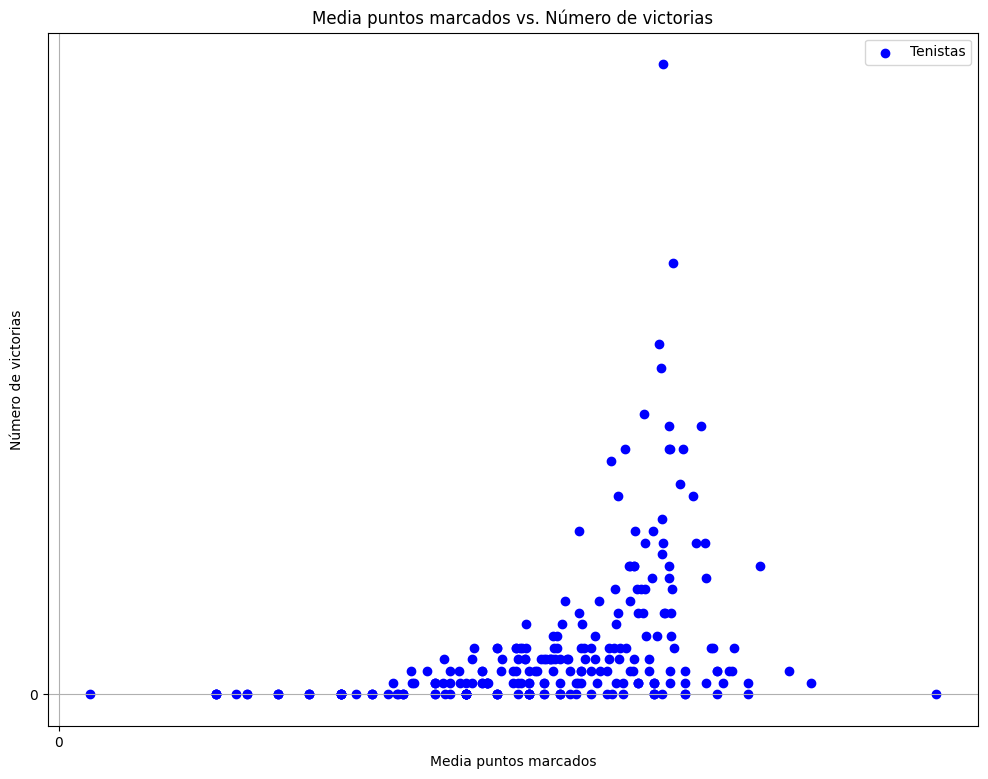

In [12]:
tenistas = get_tenistas(dataframe=datos_partidos)
puntos_marcados_todos_equipos = []
victorias_todos_equipos = []
for tenista in tenistas:
    puntos_marcados_todos_equipos.append(get_media_puntos_marcados(dataframe=datos_partidos, tenista=tenista))
    victorias_todos_equipos.append(get_victorias(dataframe=datos_partidos, tenista=tenista))
maximos_goles = max(puntos_marcados_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(puntos_marcados_todos_equipos, victorias_todos_equipos, color='blue', label='Tenistas')  # Puntos en la gráfica para cada equipo
#for i, tenista in enumerate(tenistas):
    #plt.text(puntos_marcados_todos_equipos[i], victorias_todos_equipos[i], tenista, fontsize=8, ha='left', va='bottom')
plt.xlabel('Media puntos marcados')
plt.ylabel('Número de victorias')
plt.title('Media puntos marcados vs. Número de victorias')
plt.xticks(range(0, int(maximos_goles)+1, 400))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 100))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

### Tercera aproximación: Media de goles encajados por partido

In [13]:
def get_media_puntos_recibidos(dataframe: pd.DataFrame, tenista: str) -> float:
    puntos_recibidos = get_puntos_recibidos_por_partido(dataframe=dataframe, tenistas=tenista)
    partidos_jugados = get_partidos_jugados_por_tenista(dataframe=dataframe, tenista=tenista)
    return puntos_recibidos / partidos_jugados

for tenista in tenistas:
    partidos_jugados = get_partidos_jugados_por_tenista(dataframe=datos_partidos, tenista=tenista)
    media_puntos_marcados = get_media_puntos_recibidos(dataframe=datos_partidos, tenista=tenista)
    #print("El "+tenista+" tiene una media de puntos recibidos por partido de: "+str(media_puntos_marcados))
    #print("Partidos jugados:", partidos_jugados)

### Graficar los datos

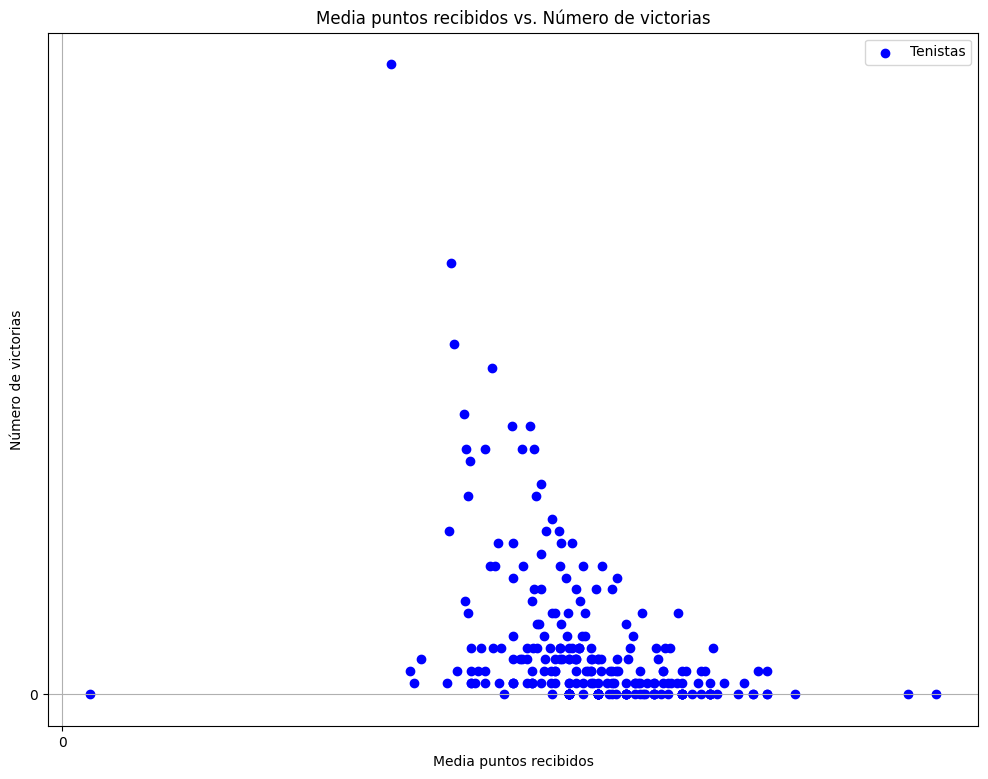

In [14]:
tenistas = get_tenistas(dataframe=datos_partidos)
puntos_marcados_todos_equipos = []
victorias_todos_equipos = []
for tenista in tenistas:
    puntos_marcados_todos_equipos.append(get_media_puntos_recibidos(dataframe=datos_partidos, tenista=tenista))
    victorias_todos_equipos.append(get_victorias(dataframe=datos_partidos, tenista=tenista))
maximos_goles = max(puntos_marcados_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(puntos_marcados_todos_equipos, victorias_todos_equipos, color='blue', label='Tenistas')  # Puntos en la gráfica para cada equipo
#for i, tenista in enumerate(tenistas):
    #plt.text(puntos_marcados_todos_equipos[i], victorias_todos_equipos[i], tenista, fontsize=8, ha='left', va='bottom')
plt.xlabel('Media puntos recibidos')
plt.ylabel('Número de victorias')
plt.title('Media puntos recibidos vs. Número de victorias')
plt.xticks(range(0, int(maximos_goles)+1, 400))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 100))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

### Cuarta aproximación: Media goles marcados - Media goles encajados

In [15]:
def get_media_puntos_average(dataframe: pd.DataFrame, tenista: str) -> int:
    puntos_a_favor = get_media_puntos_marcados(dataframe=dataframe, tenista=tenista)
    puntos_en_contra = get_media_puntos_recibidos(dataframe=dataframe, tenista=tenista)
    return puntos_a_favor - puntos_en_contra

for tenista in tenistas:
    punto_average = get_media_puntos_average(dataframe=datos_partidos, tenista=tenista)
    #print("El "+tenista+" tiene un punto average de: "+str(punto_average))

### Graficar datos

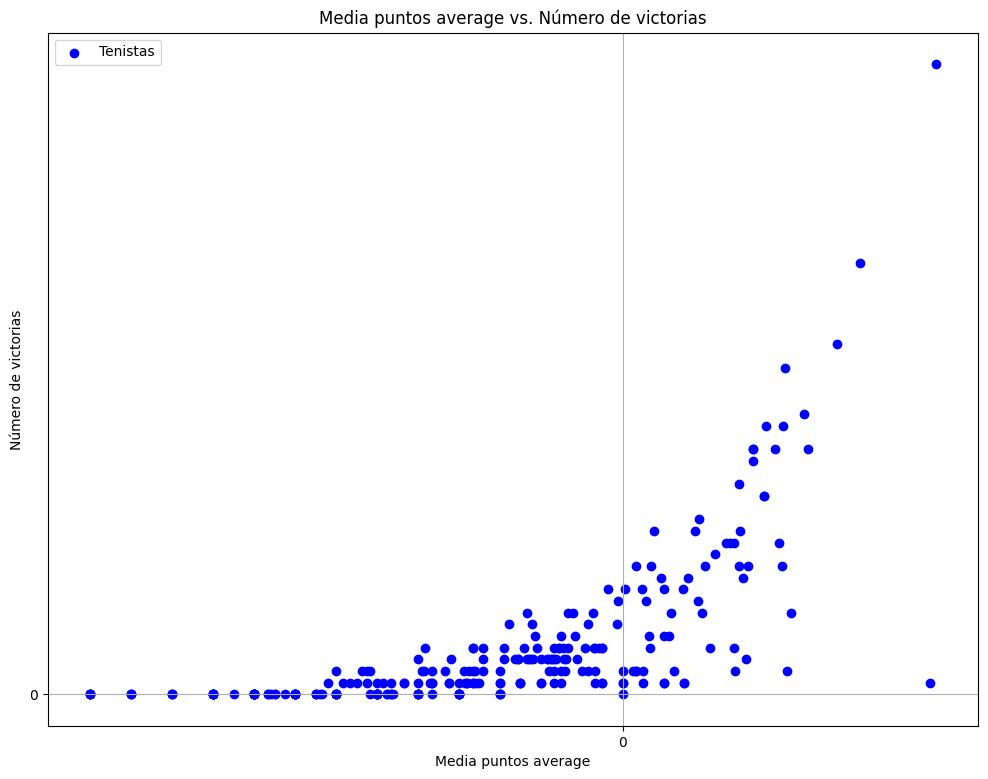

In [16]:
tenistas = get_tenistas(dataframe=datos_partidos)
puntos_marcados_todos_equipos = []
victorias_todos_equipos = []
for tenista in tenistas:
    puntos_marcados_todos_equipos.append(get_media_puntos_average(dataframe=datos_partidos, tenista=tenista))
    victorias_todos_equipos.append(get_victorias(dataframe=datos_partidos, tenista=tenista))
maximos_goles = max(puntos_marcados_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(puntos_marcados_todos_equipos, victorias_todos_equipos, color='blue', label='Tenistas')  # Puntos en la gráfica para cada equipo
#for i, tenista in enumerate(tenistas):
    #plt.text(puntos_marcados_todos_equipos[i], victorias_todos_equipos[i], tenista, fontsize=8, ha='left', va='bottom')
plt.xlabel('Media puntos average')
plt.ylabel('Número de victorias')
plt.title('Media puntos average vs. Número de victorias')
plt.xticks(range(0, int(maximos_goles)+1, 400))  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 100))  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend()
plt.show()

## Relevancia de Local o Visitante

### ¿Es importante el campo donde se juega?

In [17]:
def get_resultados_tenista(dataframe: pd.DataFrame, tenista: str) -> list:
    victoriasP = len(dataframe.loc[(dataframe['P'] == tenista) & (dataframe['Gana_P'] == 1)])
    victoriasS = len(dataframe.loc[(dataframe['S'] == tenista) & (dataframe['Gana_P'] == 0)])
    derrotasP = len(dataframe.loc[(dataframe['P'] == tenista) & (dataframe['Gana_P'] == 0)])
    derrotasS = len(dataframe.loc[(dataframe['S'] == tenista) & (dataframe['Gana_P'] == 1)])
    return (victoriasP+victoriasS,derrotasP+derrotasS)

for tenista in tenistas:
    resultados = get_resultados_tenista(dataframe=datos_partidos, tenista=tenista)
    #print(tenista)
    #print("Victorias: "+str(resultados[0]))
    #print("Derrotas: "+str(resultados[1]))

## Diferencia de gol average medio entre un partido y el anterior

### Goles marcados por partido

In [18]:
def get_puntos_marcados_por_partido(dataframe: pd.DataFrame, tenistas: str) -> list:
    lista_puntos_por_partido = []
    partidos_del_tenista = dataframe.loc[(dataframe['P'] == tenistas) | (dataframe['S'] == tenistas)]
    for idx, partido in partidos_del_tenista.iterrows():
        if partido['P'] == tenistas:
            lista_puntos_por_partido.append(partido['P1']+partido['P2']+partido['P3']+partido['P4']+partido['P5'])
        if partido['S'] == tenistas:
            lista_puntos_por_partido.append(partido['S1']+partido['S2']+partido['S3']+partido['S4']+partido['S5'])
    return lista_puntos_por_partido
for tenista in tenistas:
    lista = get_puntos_marcados_por_partido(dataframe=datos_partidos, tenistas=tenista)
    #print(lista)

### Goles encajados por partido

In [19]:
def get_puntos_encajados_por_partido(dataframe: pd.DataFrame, tenistas: str) -> list:
    lista_puntos_por_partido = []
    partidos_del_tenista = dataframe.loc[(dataframe['P'] == tenistas) | (dataframe['S'] == tenistas)]
    for idx, partido in partidos_del_tenista.iterrows():
        if partido['P'] == tenistas:
            lista_puntos_por_partido.append(partido['S1']+partido['S2']+partido['S3']+partido['S4']+partido['S5'])
        if partido['S'] == tenistas:
            lista_puntos_por_partido.append(partido['P1']+partido['P2']+partido['P3']+partido['P4']+partido['P5'])
    return lista_puntos_por_partido

for tenista in tenistas:
    lista = get_puntos_encajados_por_partido(dataframe=datos_partidos, tenistas=tenista)
    #print(lista)

### Media goles marcados por partido

In [20]:
def get_media_puntos_marcados_por_partido(dataframe: pd.DataFrame, tenistas: str) -> list:
    lista_puntos_por_partido = get_puntos_marcados_por_partido(dataframe=dataframe, tenistas=tenistas)
    lista_media_puntos_por_partido = []
    puntos_acumulados = 0
    for idx, valor in enumerate(lista_puntos_por_partido):
        lista_media_puntos_por_partido.append((valor + puntos_acumulados) / (idx+1))
        puntos_acumulados += valor
    return lista_media_puntos_por_partido

for tenista in tenistas:
    lista = get_media_puntos_marcados_por_partido(dataframe=datos_partidos, tenistas=tenista)
    #print(lista)

### Media goles encajados por partido

In [21]:
def get_media_puntos_encajados_por_partido(dataframe: pd.DataFrame, tenistas: str) -> list:
    lista_puntos_por_partido = get_puntos_encajados_por_partido(dataframe=dataframe, tenistas=tenistas)
    lista_media_puntos_por_partido = []
    puntos_acumulados = 0
    for idx, valor in enumerate(lista_puntos_por_partido):
        lista_media_puntos_por_partido.append((valor + puntos_acumulados) / (idx+1))
        puntos_acumulados += valor
    return lista_media_puntos_por_partido

for tenista in tenistas:
    lista = get_media_puntos_encajados_por_partido(dataframe=datos_partidos, tenistas=tenista)
    #print(lista)

### Gol average por partido

In [22]:
def get_punto_average_por_partido(dataframe: pd.DataFrame, tenistas: str) -> list:
    lista_goles_marcados_por_partido = get_puntos_marcados_por_partido(dataframe=dataframe, tenistas=tenistas)
    lista_goles_encajados_por_partido = get_puntos_encajados_por_partido(dataframe=dataframe, tenistas=tenistas)
    lista_gol_average_por_partido = []
    for idx, valor in enumerate(lista_goles_marcados_por_partido):
        lista_gol_average_por_partido.append(valor - lista_goles_encajados_por_partido[idx])
    return lista_gol_average_por_partido

for tenista in tenistas:
    lista = get_punto_average_por_partido(dataframe=datos_partidos, tenistas=tenista)
    #print(lista)

### Gol average medio por partido

In [23]:
def get_media_punto_average_por_partido(dataframe: pd.DataFrame, tenistas: str) -> list:
    lista_puntos_marcados_por_partido = get_puntos_marcados_por_partido(dataframe=dataframe, tenistas=tenistas)
    lista_puntos_encajados_por_partido = get_puntos_encajados_por_partido(dataframe=dataframe, tenistas=tenistas)
    lista_media_punto_average_por_partido = []
    valor_acumulado = 0
    for idx, valor in enumerate(lista_puntos_marcados_por_partido):
        lista_media_punto_average_por_partido.append((valor - lista_puntos_encajados_por_partido[idx] + valor_acumulado) / (idx+1))
        valor_acumulado += (valor - lista_puntos_encajados_por_partido[idx])
    return lista_media_punto_average_por_partido

for tenista in tenistas:
    lista = get_media_punto_average_por_partido(dataframe=datos_partidos, tenistas=tenista)
    #print(lista)

## Graficar los datos

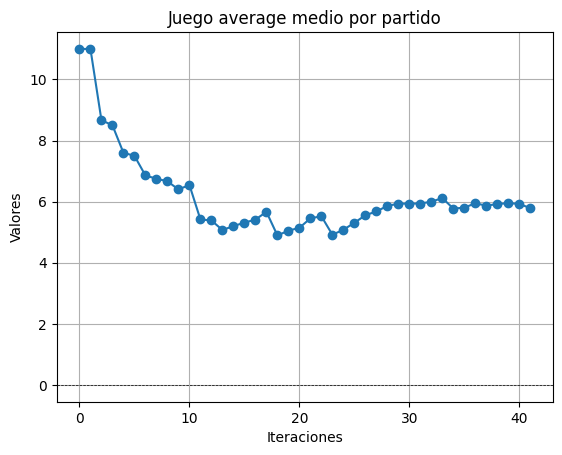

In [24]:
datos = get_media_punto_average_por_partido(dataframe=datos_partidos, tenistas="Nadal R.")
iteraciones = range(len(datos))

plt.plot(iteraciones, datos, marker='o', linestyle='-')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.xlabel('Iteraciones')
plt.ylabel('Valores')

plt.title('Juego average medio por partido')

plt.grid(True)
plt.show()

### Diferencia de gol average medio respecto al partido anterior

In [25]:
def get_diferencia_media_punto_average_por_partido(dataframe: pd.DataFrame, tenistas: str) -> list:
    lista_media_punto_average_por_partido = get_media_punto_average_por_partido(dataframe=dataframe, tenistas=tenistas)
    lista_diferencias = []
    valor_anterior = 0
    for valor in lista_media_punto_average_por_partido:
        lista_diferencias.append(valor - valor_anterior)
        valor_anterior = valor
    return lista_diferencias

for tenista in tenistas:
    lista = get_diferencia_media_punto_average_por_partido(dataframe=datos_partidos, tenistas=tenista)
    #print(lista)

### Graficar datos

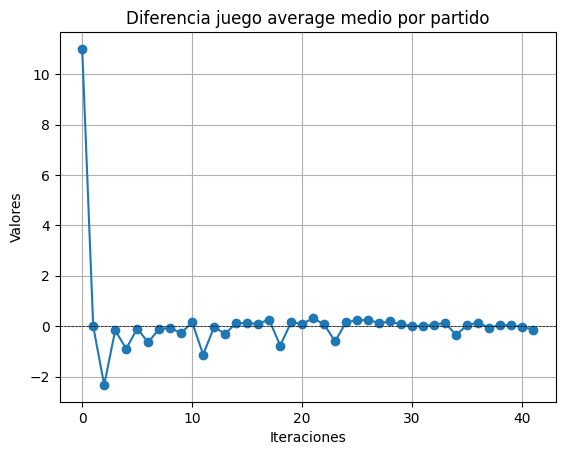

In [26]:
datos = get_diferencia_media_punto_average_por_partido(dataframe=datos_partidos, tenistas="Nadal R.")
iteraciones = range(len(datos))

plt.plot(iteraciones, datos, marker='o', linestyle='-')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.xlabel('Iteraciones')
plt.ylabel('Valores')

plt.title('Diferencia juego average medio por partido')

plt.grid(True)
plt.show()

### Graficar gol average medio y diferencias

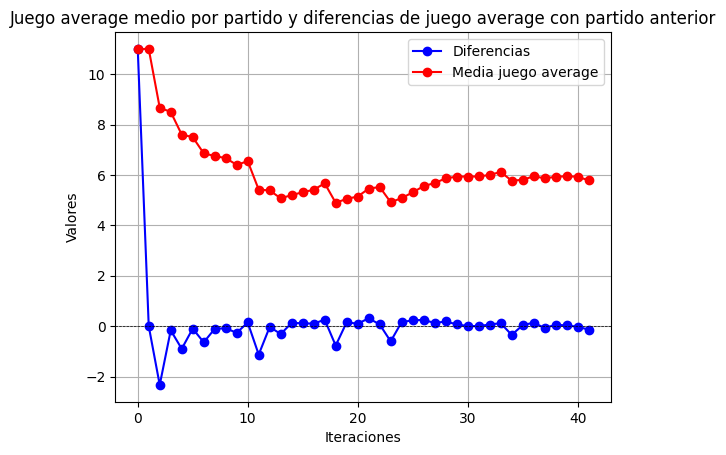

In [27]:
datos1 = get_diferencia_media_punto_average_por_partido(dataframe=datos_partidos, tenistas="Nadal R.")
datos2 = get_media_punto_average_por_partido(dataframe=datos_partidos,tenistas="Nadal R.")
iteraciones = range(len(datos1))

plt.plot(iteraciones, datos1, marker='o', linestyle='-', color='blue', label='Diferencias')
plt.plot(iteraciones, datos2, marker='o', linestyle='-', color='red', label='Media juego average')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.xlabel('Iteraciones')
plt.ylabel('Valores')

plt.title('Juego average medio por partido y diferencias de juego average con partido anterior')

plt.legend()
plt.grid(True)
plt.show()

In [28]:
def get_resultados_equipo(dataframe: pd.DataFrame, tenistas: str) -> list:
    lista_resultados = []
    for idx, fila in dataframe.iterrows():
        if fila['P'] == tenistas:
            if fila['Gana_P'] == 1:
                lista_resultados.append('Win')
            else:
                lista_resultados.append('Defeat')
        if fila['S'] == tenistas:
            if fila['Gana_P'] == 0:
                lista_resultados.append('Win')
            else:
                lista_resultados.append('Defeat')
    return lista_resultados

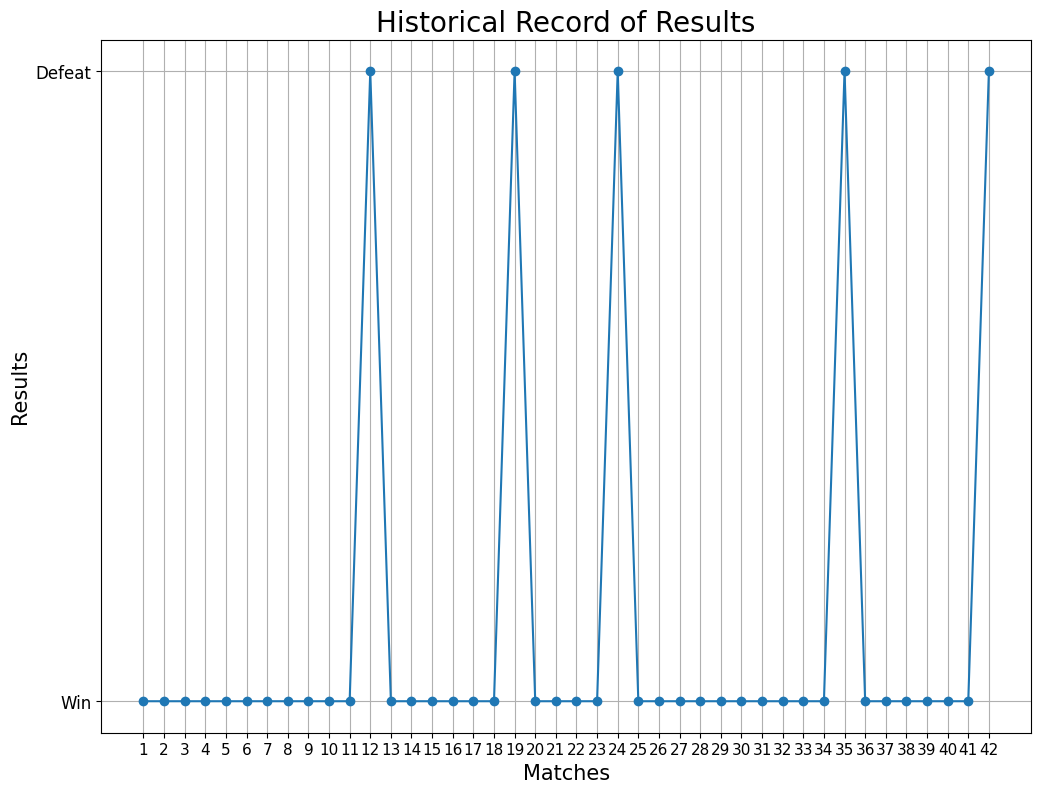

In [30]:
datos = get_resultados_equipo(dataframe=datos_partidos, tenistas="Nadal R.")
longitud = len(datos)
plt.figure(figsize=(12, 9))
plt.plot(range(1, longitud + 1), datos, marker='o')

plt.xticks(range(1, longitud + 1), fontsize=11)
plt.yticks(fontsize=12)

plt.xlabel('Matches', fontsize=15)
plt.ylabel('Results', fontsize=15)

plt.title('Historical Record of Results', fontsize=20)

plt.grid(True)
plt.show()
lista_victorias = []
lista_derrotas = []
victorias = 0
derrotas = 0
for dato in datos:
    if dato == 'Win':
        victorias += 1
    else:
        derrotas += 1
    lista_victorias.append(victorias)
    lista_derrotas.append(derrotas)
data = {
        'Matches': list(range(longitud)),
        'Victorias': lista_victorias,
        'Derrotas': lista_derrotas
    }

df = pd.DataFrame(data)

# Exportar a un archivo Excel
df.to_excel('resultados_nadal.xlsx', index=False)

In [31]:
def get_sets_sin_encajar(dataframe: pd.DataFrame, tenistas: str) -> list:
    lista_sets_sin_encajar = []
    partidos_del_tenista = dataframe.loc[(dataframe['P'] == tenistas) | (dataframe['S'] == tenistas)]
    for idx, partido in partidos_del_tenista.iterrows():
        valor = 0
        if partido['P'] == tenistas:
            if partido['S1'] == 0:
                valor += 1
            if partido['S2'] == 0:
                valor += 1
            if partido['S3'] == 0:
                valor += 1
            if partido['S4'] == 0 and partido['P4'] != 0:
                valor += 1
            if partido['S5'] == 0 and partido['P5'] != 0:
                valor += 1
        if partido['S'] == tenistas:
            if partido['P1'] == 0:
                valor += 1
            if partido['P2'] == 0:
                valor += 1
            if partido['P3'] == 0:
                valor += 1
            if partido['P4'] == 0 and partido['S4'] != 0:
                valor += 1
            if partido['P5'] == 0 and partido['S5'] != 0:
                valor += 1
        lista_sets_sin_encajar.append(valor) 
    return lista_sets_sin_encajar.count(0)

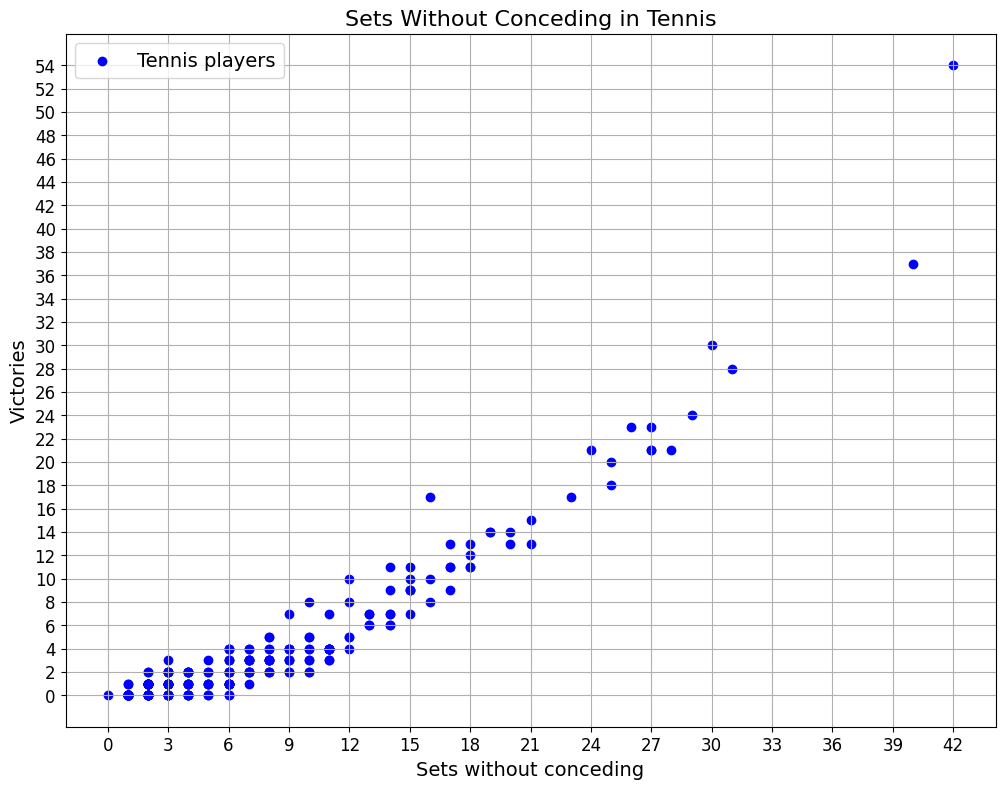

In [32]:
equipos = get_tenistas(dataframe=datos_partidos)
porterias_a_0_todos_equipos = []
victorias_todos_equipos = []
for equipo in equipos:
    porterias_a_0_todos_equipos.append(get_sets_sin_encajar(dataframe=datos_partidos, tenistas=equipo))
    victorias_todos_equipos.append(get_victorias(dataframe=datos_partidos, tenista=equipo))
maximos_puntos = max(porterias_a_0_todos_equipos)
maximas_victorias = max(victorias_todos_equipos)

plt.figure(figsize=(12, 9))
plt.scatter(porterias_a_0_todos_equipos, victorias_todos_equipos, color='blue', label='Tennis players')  # Puntos en la gráfica para cada equipo
#for i, equipo in enumerate(equipos):
#    plt.text(porterias_a_0_todos_equipos[i], victorias_todos_equipos[i], equipo, fontsize=8, ha='left', va='bottom')

# Ajustar tamaño de fuente
plt.xlabel('Sets without conceding', fontsize=14)
plt.ylabel('Victories', fontsize=14)
plt.title('Sets Without Conceding in Tennis', fontsize=16)
plt.xticks(range(0, round(maximos_puntos)+1, 3), fontsize=12)  # Definir los límites y el paso del eje x
plt.yticks(range(0, maximas_victorias+1, 2), fontsize=12)  # Definir los límites y el paso del eje y
plt.grid(True)
plt.legend(fontsize=14)
plt.show()

data = {
        'Sets without conceding': porterias_a_0_todos_equipos,
        'Victories': victorias_todos_equipos
    }

df = pd.DataFrame(data)

# Exportar a un archivo Excel
df.to_excel('defensa.xlsx', index=False)
